In [1]:
import sys
# !{sys.executable} -m pip install --pre gluoncv

In [2]:
import warnings
warnings.filterwarnings('ignore')

import mxnet as mx
import numpy as np
import gluoncv as gcv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mxnet import nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.model_zoo import get_model
from gluoncv.utils import viz, download

# Image Classification

Image classification is the basic building block for computer vision tasks. We demonstrate our classification with pre-trained models.

First, we load the data.

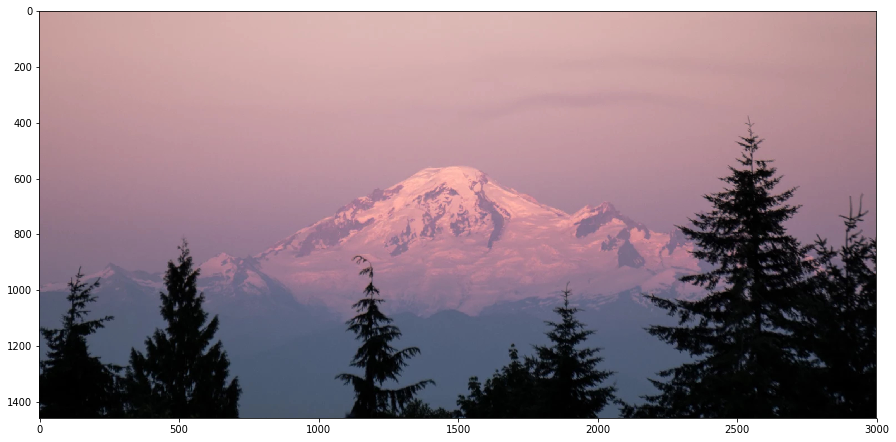

In [3]:
plt.rcParams['figure.figsize'] = (15, 9)

img = image.imread('mt_baker.jpg')
viz.plot_image(img)
plt.show()

With this one-line code, we can load a pre-trained **ResNet50_v1** model for classification.

In [4]:
net = get_model('resnet50_v1', pretrained=True)

Before we feed the image into the model, normalization on the image is necessary.

In [5]:
transform_fn = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = transform_fn(img)

With another one-line code we can have our prediction.

In [6]:
pred = net(img.expand_dims(0))

Let's review the top 5 prediction results.

In [7]:
classes_fname = download('https://raw.githubusercontent.com/hetong007/gluon-cv/master/scripts/classification/imagenet/imagenet_labels.txt',
                         'imagenet_labels.txt')
with open('imagenet_labels.txt', 'r') as f:
    class_names = [l.strip('\n') for l in f.readlines()]

topK = 5
ind = nd.topk(pred, k=topK).astype('int')[0]
for i in range(topK):
    print('[%s], with probability %.1f%%'%
         (class_names[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()*100))

[volcano], with probability 70.2%
[alp], with probability 23.0%
[mountain_tent], with probability 2.7%
[lakeside], with probability 0.8%
[yurt], with probability 0.5%


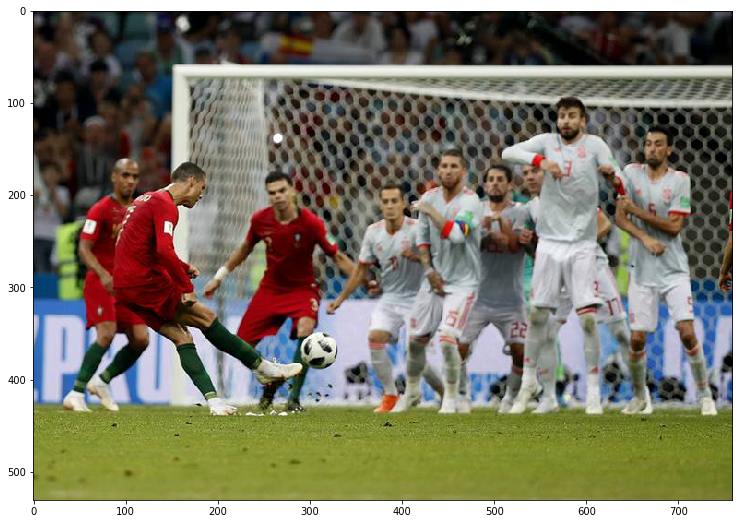

In [8]:
img = image.imread('cr7.jpg')
viz.plot_image(img)
plt.show()

In [9]:
img = transform_fn(img)
pred = net(img.expand_dims(0))
ind = nd.topk(pred, k=topK).astype('int')[0]
for i in range(topK):
    print('[%s], with probability %.1f%%'%
         (class_names[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()*100))

[soccer_ball], with probability 75.4%
[ballplayer], with probability 10.6%
[basketball], with probability 3.7%
[volleyball], with probability 2.6%
[racket], with probability 2.2%


# Object Detection

Image classifications are trained to recognize the main object in the scene. What if we have multiple subjects?

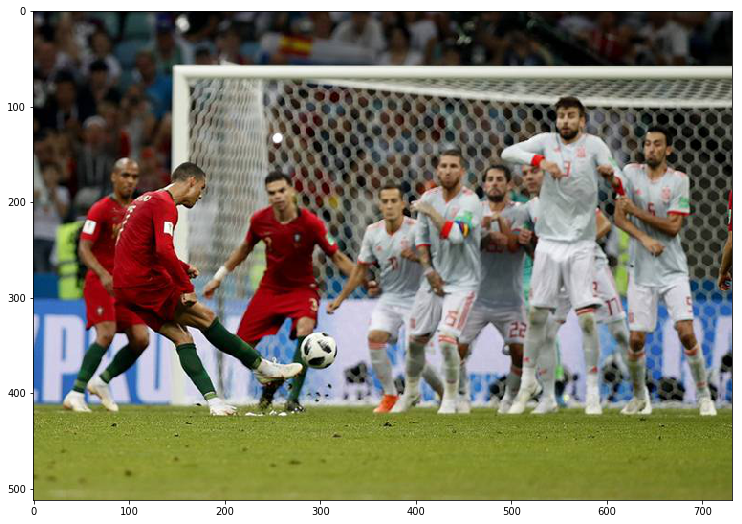

In [10]:
x, img = gcv.data.transforms.presets.ssd.load_test('cr7.jpg', short=512)
viz.plot_image(img)
plt.show()

We can instead predict with an object detection model **SSD**.

In [11]:
net = get_model('ssd_512_resnet50_v1_coco', pretrained=True)

Now we predict. Notice we have three output variables.

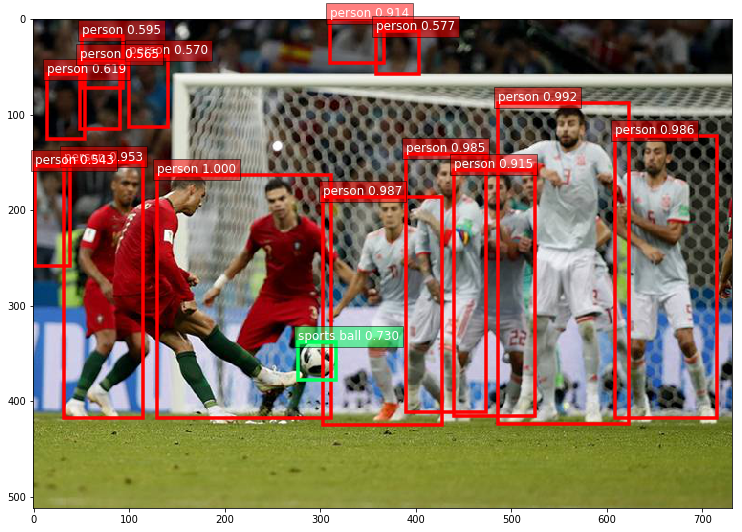

In [12]:
class_IDs, scores, bounding_boxs = net(x)
viz.plot_bbox(img, bounding_boxs[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

How about we count how many people are here today?

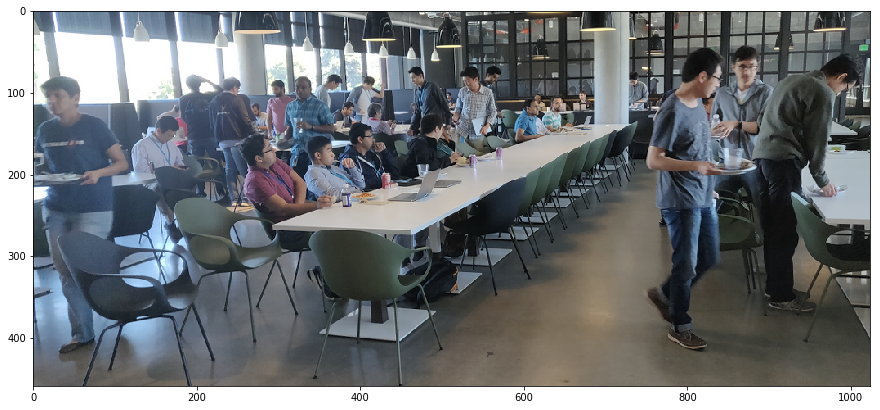

In [13]:
x, img = gcv.data.transforms.presets.ssd.load_test('crowd.png', short=512)
viz.plot_image(img)
plt.show()

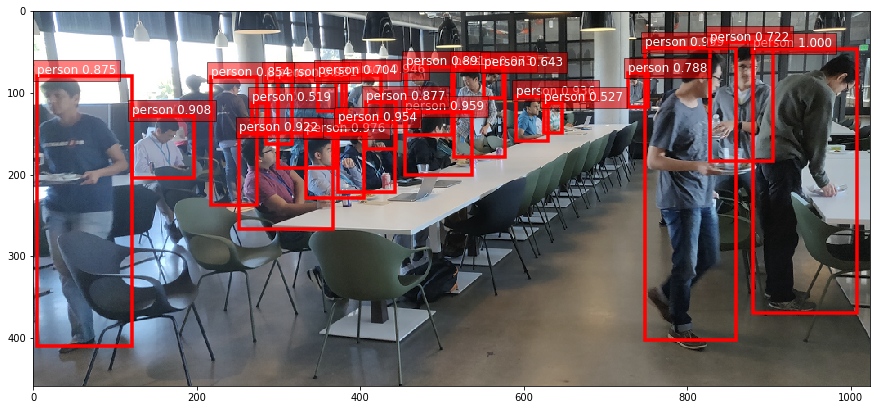

There are 31 people in this photo.


In [14]:
class_IDs, scores, bounding_boxs = net(x)
person_ind = [i for i, cls in enumerate(net.classes) if cls == 'person']
ind = np.nonzero(class_IDs[0].asnumpy() == person_ind)[0]

new_class_IDs = class_IDs[0][ind]
new_scores = scores[0][ind]
new_bounding_boxs = bounding_boxs[0][ind]

viz.plot_bbox(img, new_bounding_boxs, new_scores, new_class_IDs, class_names=net.classes)
plt.show()

print('There are %d people in this photo.'%(len(ind)))

Another scenario, following the heating topic: automated driving.

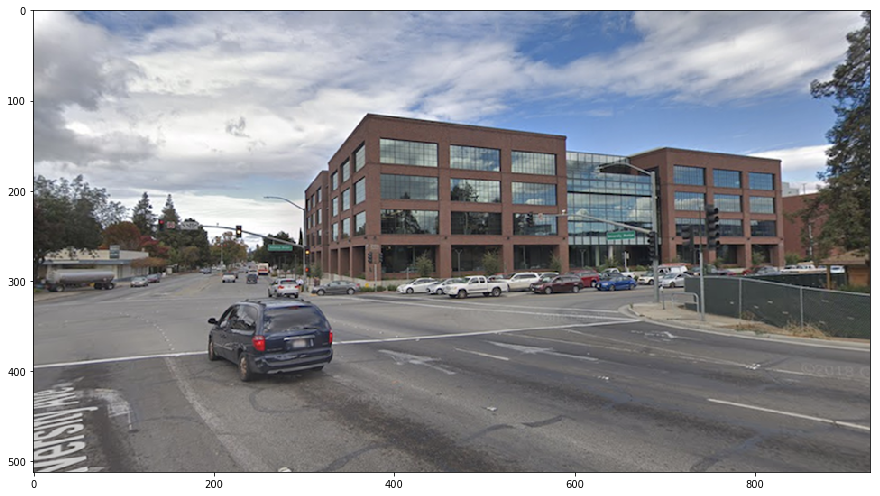

In [15]:
x, img = gcv.data.transforms.presets.ssd.load_test('streetview_amazon.png', short=512)
viz.plot_image(img)
plt.show()

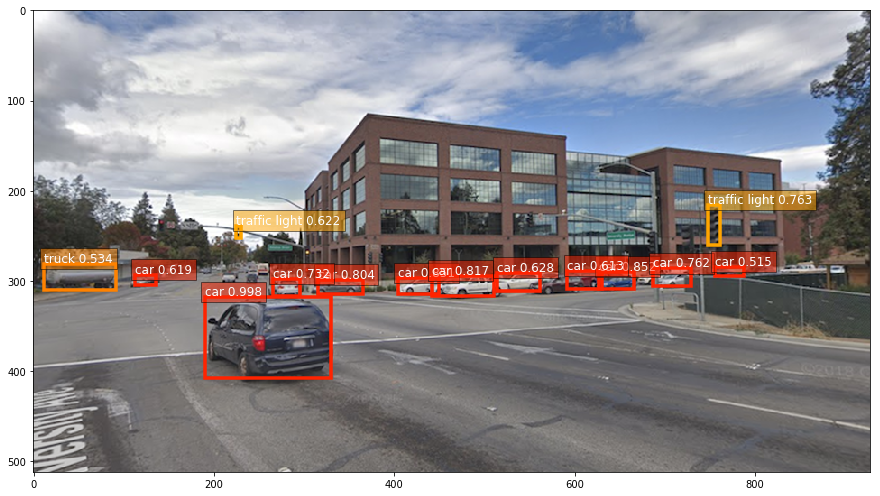

In [16]:
class_IDs, scores, bounding_boxs = net(x)
viz.plot_bbox(img, bounding_boxs[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

# Semantic Segmentation

Semantic segmentation takes the concept further, by predicting the class for every pixel.

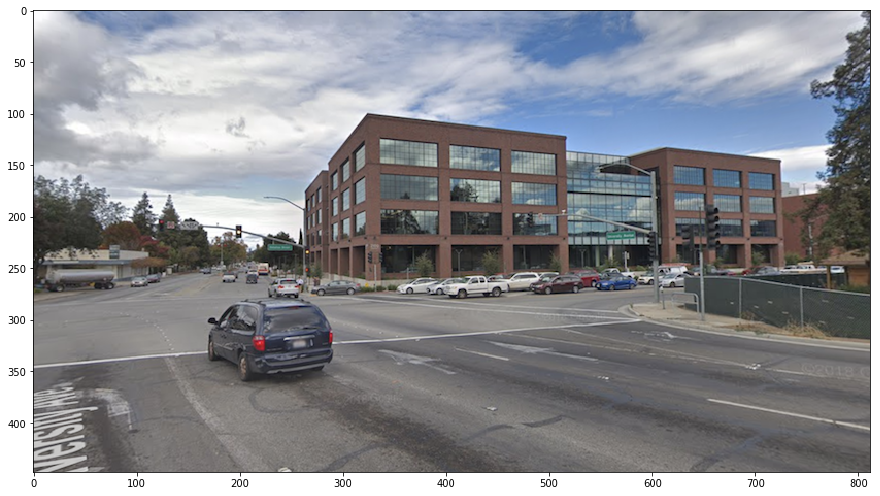

In [17]:
img = image.imread('streetview_amazon.png')
viz.plot_image(img)
plt.show()

In [18]:
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])
img = transform_fn(img)
img = img.expand_dims(0)

(1, 3, 448, 812)

In [19]:
net = get_model('fcn_resnet50_ade', pretrained=True)

In [20]:
output = net.demo(img)
pred = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

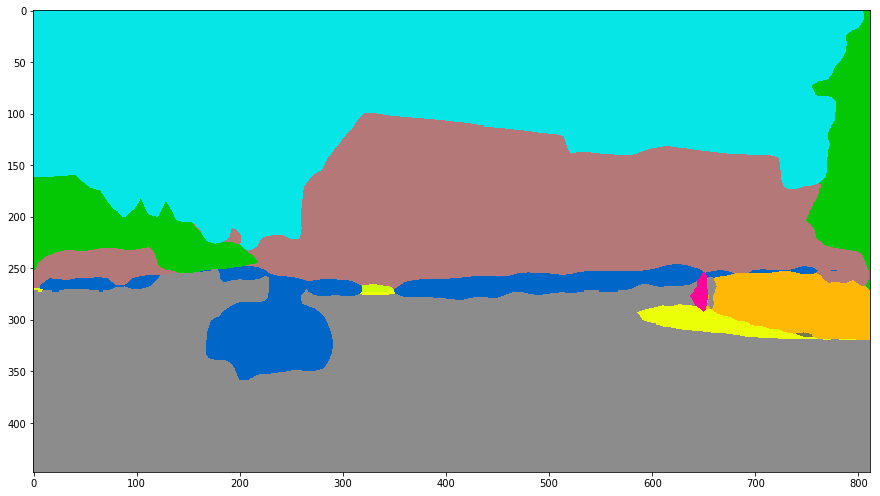

In [21]:
mask = viz.get_color_pallete(pred, 'ade20k')
mask.save('output_amazon.png')
mmask = mpimg.imread('output_amazon.png')
plt.imshow(mmask)
plt.show()

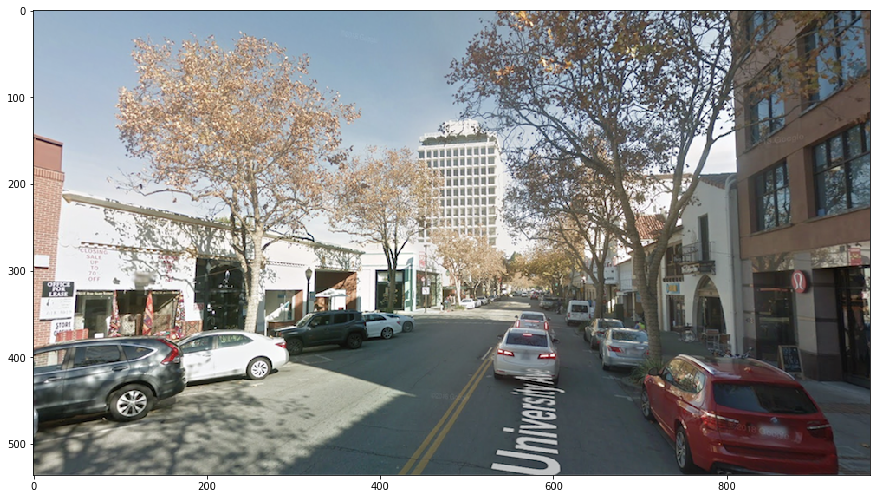

In [22]:
img = image.imread('streetview_paloalto.png')
viz.plot_image(img)
plt.show()

In [23]:
img = transform_fn(img)
img = img.expand_dims(0)

In [24]:
output = net.demo(img)
pred = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

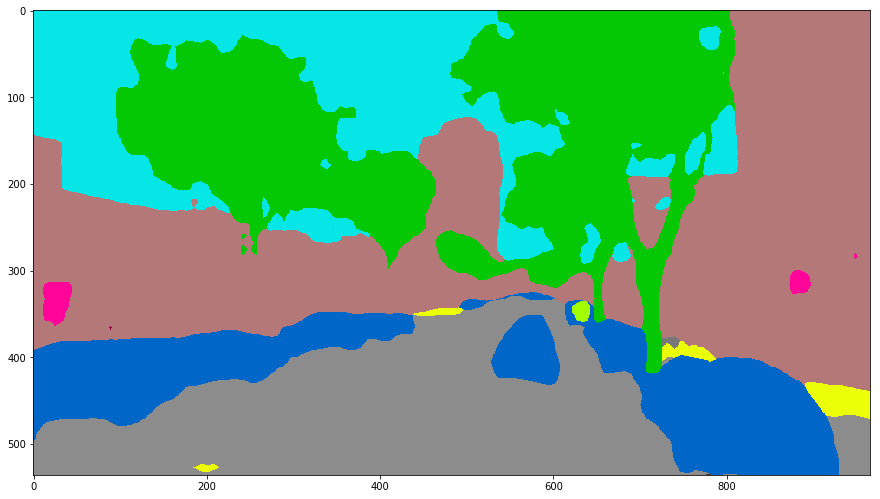

In [25]:
mask = viz.get_color_pallete(pred, 'ade20k')
mask.save('output_paloalto.png')
mmask = mpimg.imread('output_paloalto.png')
plt.imshow(mmask)
plt.show()